In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# plotting defaults
plt.rc('figure', figsize=(16, 8))
plt.style.use('dark_background')
plt.rc('font', size=16)

from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter

# visualize 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Let's predict the future of weather!

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Project Goals
- The goal of this project is to go through the data science pipeline and deliver a model that will forecast the temperature into the future.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Project Planning

- Create README.md with data dictionary, project and business goals, and come up with initial hypotheses.

- Acquire data from the Codeup Database and create a function to automate this process. 
- Clean and prepare data for the first iteration through the pipeline. Create a function to automate the process. 
- Store the acquisition and preparation functions in a wrangle.py module function, and prepare data in Final Report Notebook by importing and using the function.
- Train at least 3 different Time Series Analysis models.
- Evaluate models on train and validate datasets.
- Choose the model that performs the best and evaluate that single model on the test dataset.
- Document conclusions, takeaways, and next steps in the Final Report Notebook.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Wrangling/Train, Test Split

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [2]:
# Obtaining data from the CodeUP database through a SQL query that can be found in wrangle.py
df = pd.read_csv('temp.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
df.shape

(8599212, 7)

In [4]:
def prep_weather():
    df = pd.read_csv('temp.csv')
    df.columns = df.columns.str.lower()
    df = df.dropna()
    
    # converting the units of the data we are ingesting
    df.averagetemperature = (df.averagetemperature * 1.8) + 32

    # Changing dt column to datetime format
    df.dt = pd.to_datetime(df.dt, format= '%Y/%m/%d')

    # Setting index as the dates
    df = df.set_index('dt')
    df.sort_index()

    # Choosing a city to focus in on
    df = df[df.country == 'United States']
    df = df[df.city == 'Los Angeles']
    # Making columns to further breakdown the time.
    df['month'] = df.index.strftime('%B')
    return df


In [5]:
df =prep_weather()

### Now to spilt the data into Train, Test subsets

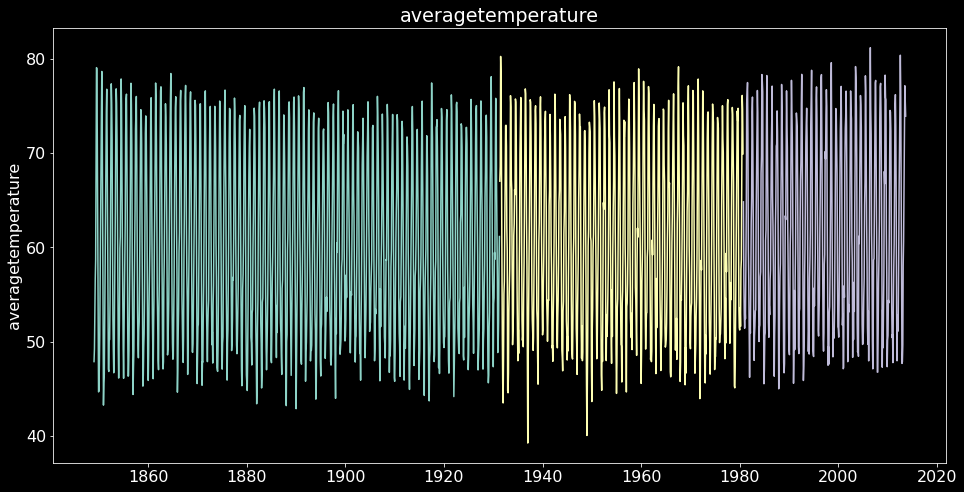

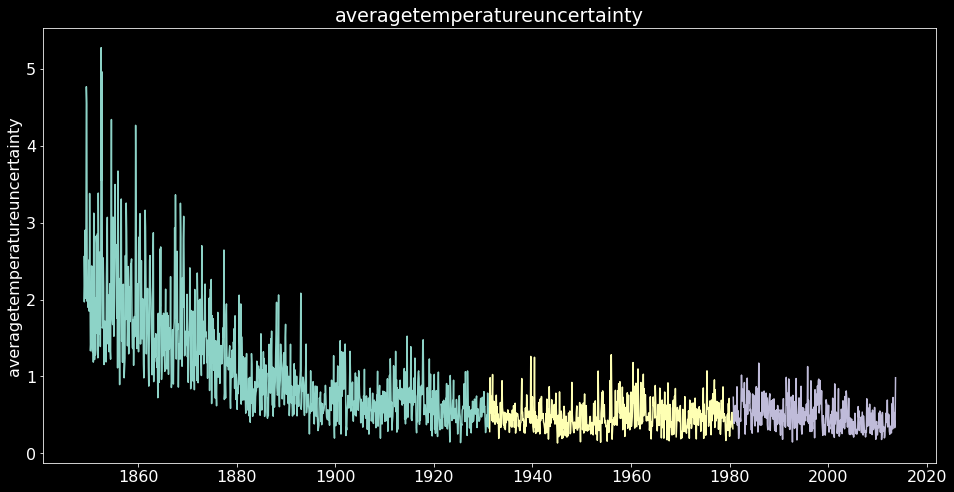

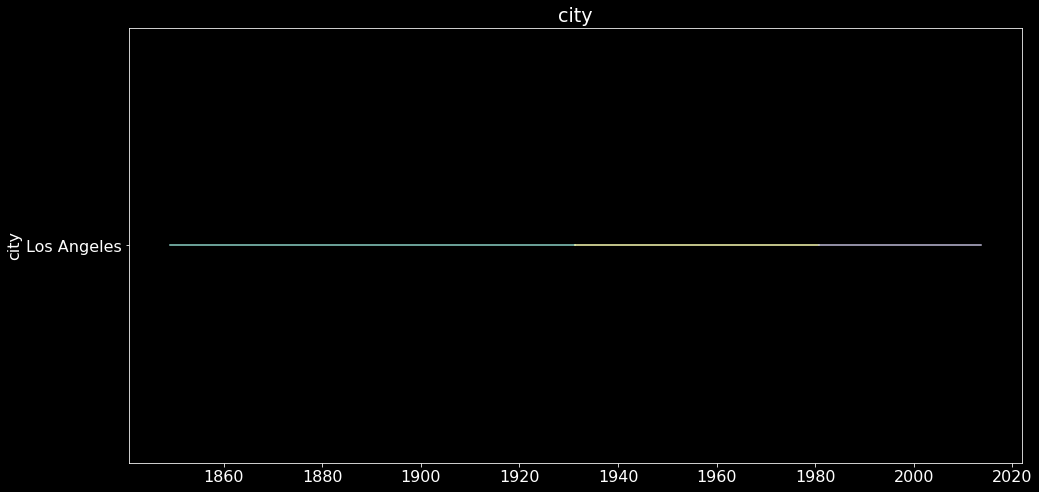

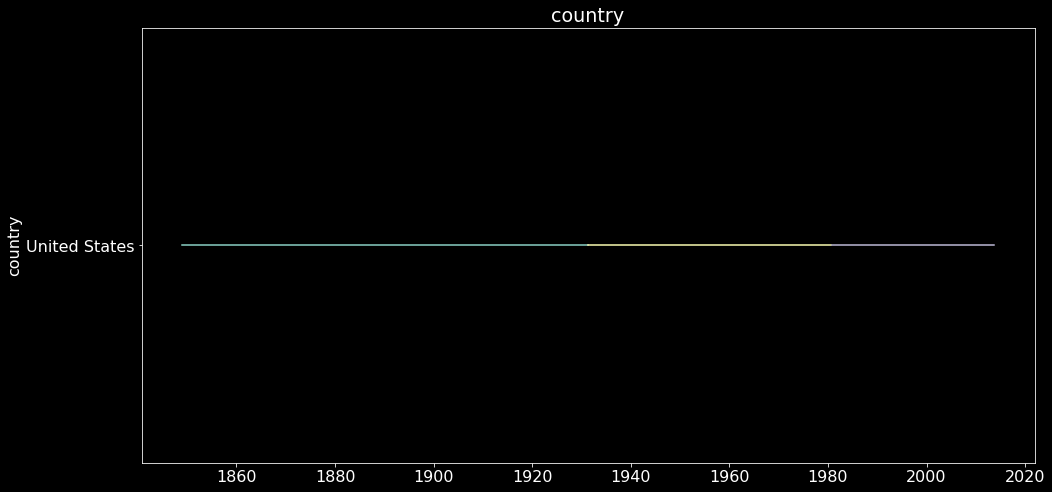

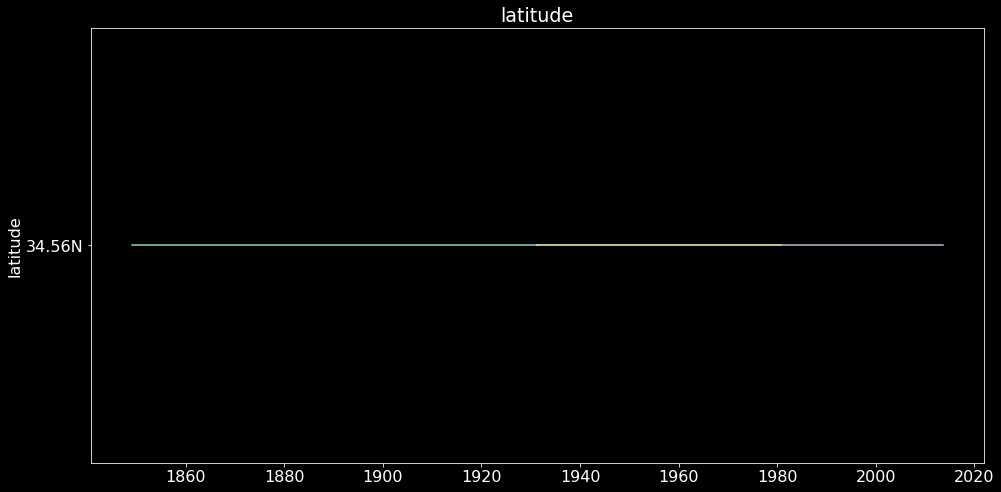

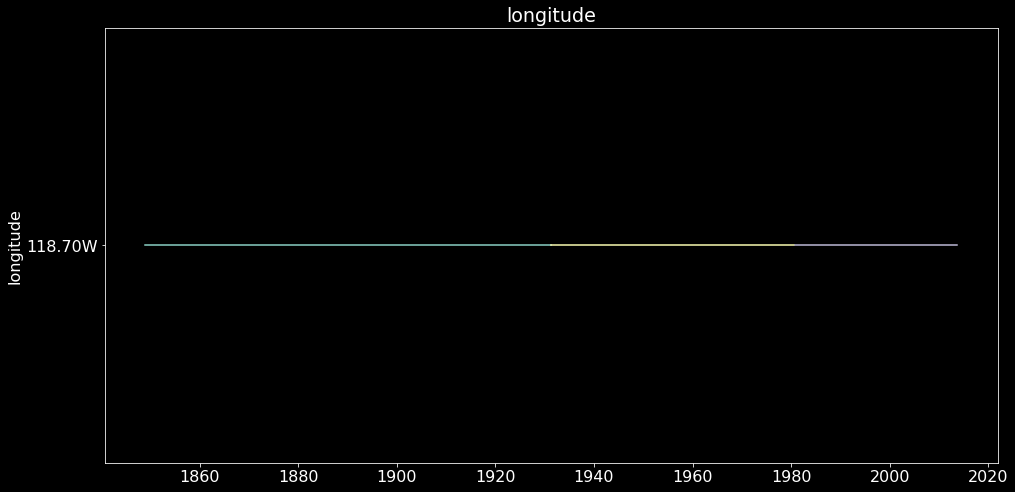

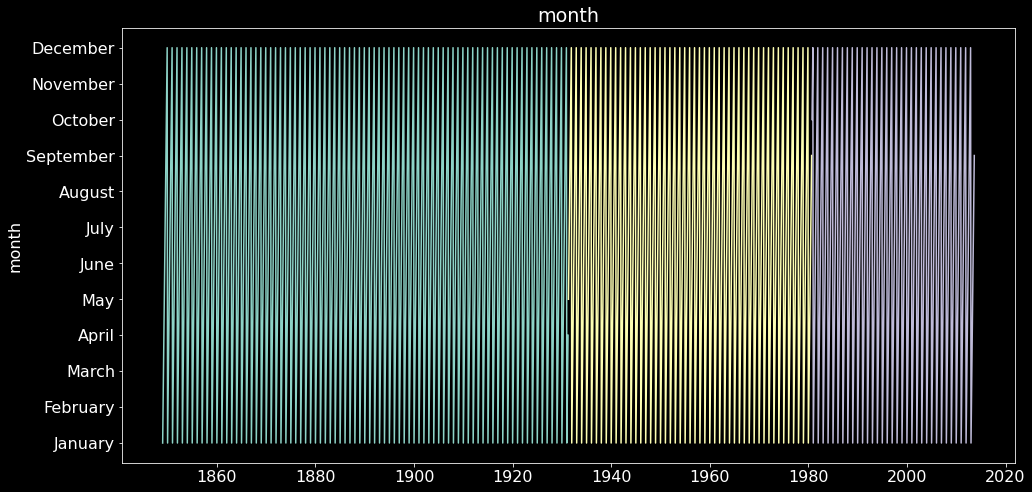

In [6]:
train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

for col in train.columns:
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [7]:
train.index.max()

Timestamp('1931-04-01 00:00:00')

In [8]:
validate.index.max()

Timestamp('1980-09-01 00:00:00')

##  Wrangling Takeaways
- Started off by pulling in the data using a csv provided from Kaggle.
- Transformed it into a DataFrame and discarded any nulls in the Dataframe.
- Split the dataset into train, validate and test sets to prevent data leakage.

# Intial Questions
- Overtime how is Temperature Uncertainty affected?
- How does the average temperature look when distributed across different time intervals?
- How radically does the temperature change over time?
- Overtime, does the temperature consistenly fall in same temperature range?

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Exploration

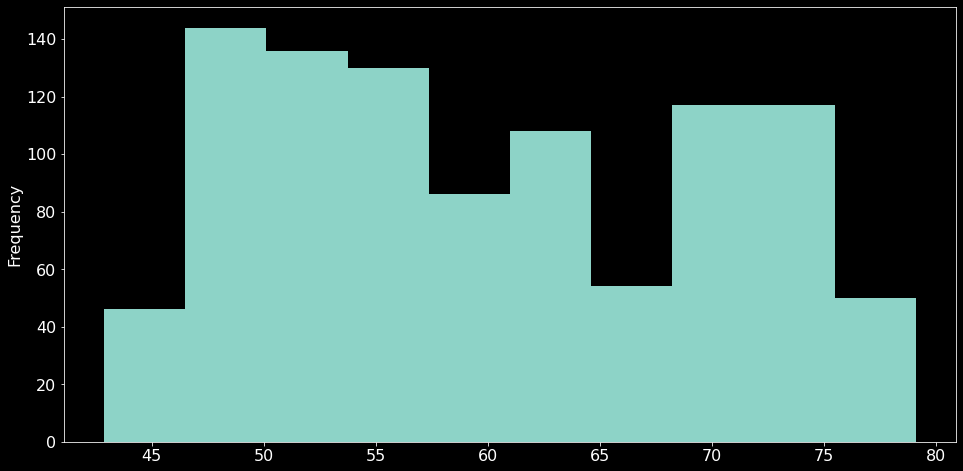

In [9]:
# We can make a histogram to show the distribution of our target variable:
y = train.averagetemperature
y.plot.hist()
plt.show()

## 1. Overtime how is Temperature Uncertainty affected?

Text(0, 0.5, 'Average Temperature')

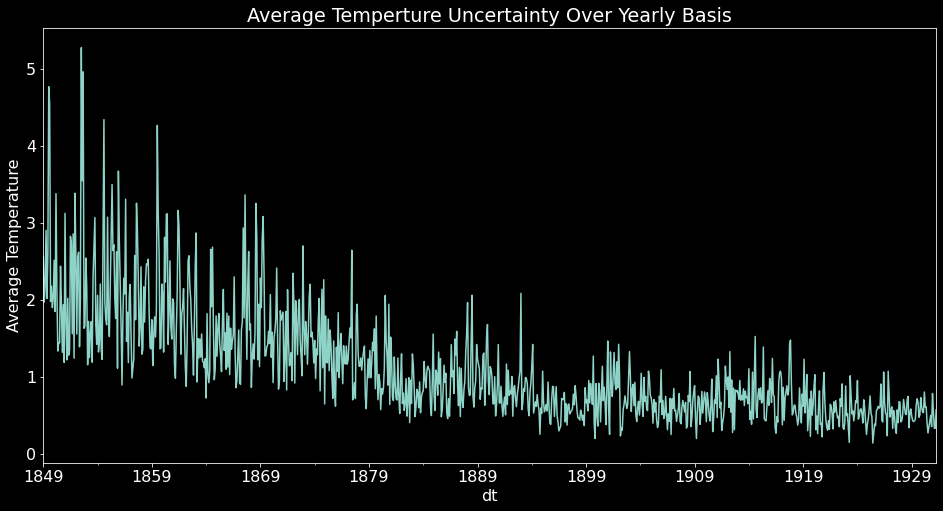

In [10]:
train.averagetemperatureuncertainty.resample('M').mean().plot(title='Average Temperture Uncertainty Over Yearly Basis')
plt.ylabel('Average Temperature')

#### Takeaways:
- Uncertainty falls as the years go by which is a good sign meaning as time progresses we are getting more and more accurate in weather prediction.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 2.How does the average temperature look when distributed across different time intervals?

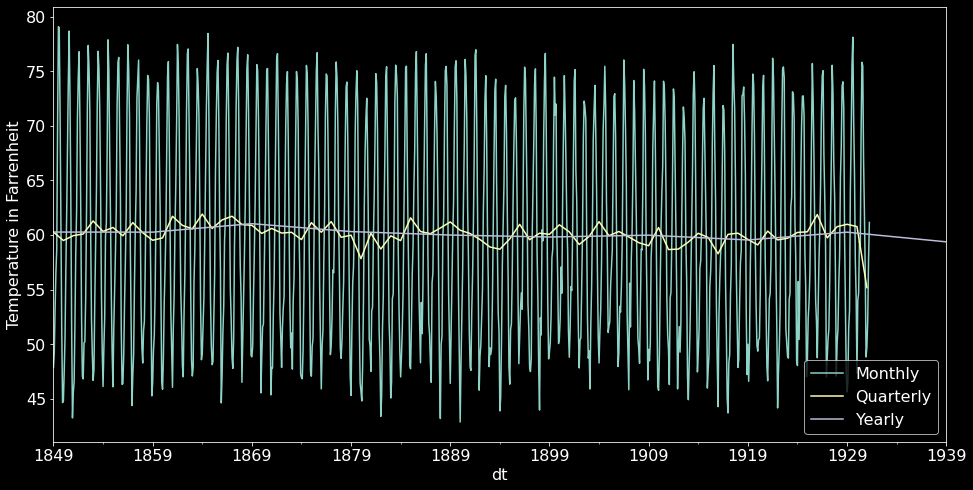

In [11]:
y.resample('M').mean().plot(label='Monthly')
y.resample('Y').mean().plot(label='Quarterly')
y.resample('10Y').mean().plot(label='Yearly')
plt.ylabel('Temperature in Farrenheit')
plt.legend()
plt.show()

#### Takeaways
- It seems that no matter the way of visualization, the weather follows a consistent pattern.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 3. How radically does the temperature change over time?

Text(0, 0.5, 'Temperature Differences')

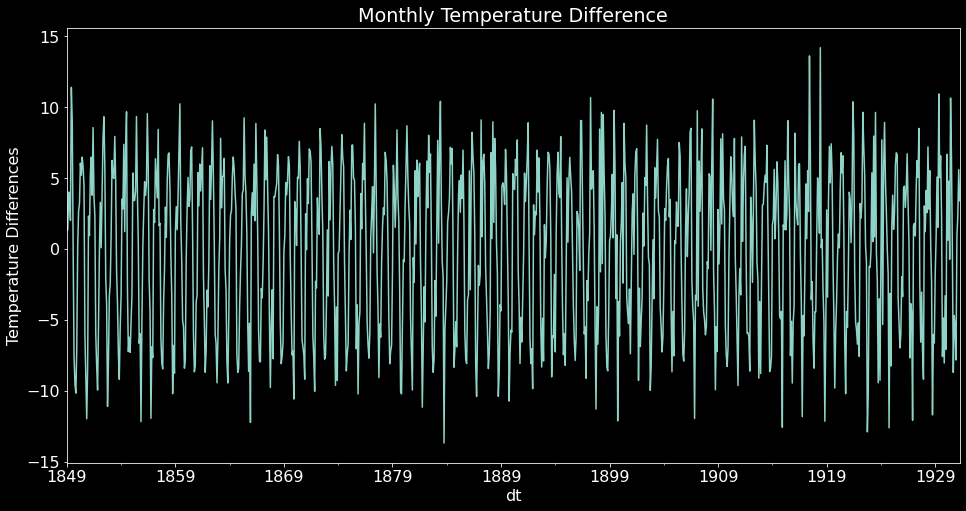

In [12]:
y.diff().plot()
plt.title('Monthly Temperature Difference')
plt.ylabel('Temperature Differences')

- Average Temperature seems consistent and apattern can be seen, this will be good in being able to predict the forecast.

## 4. Overtime, does the temperature consistenly fall in same temperature range?

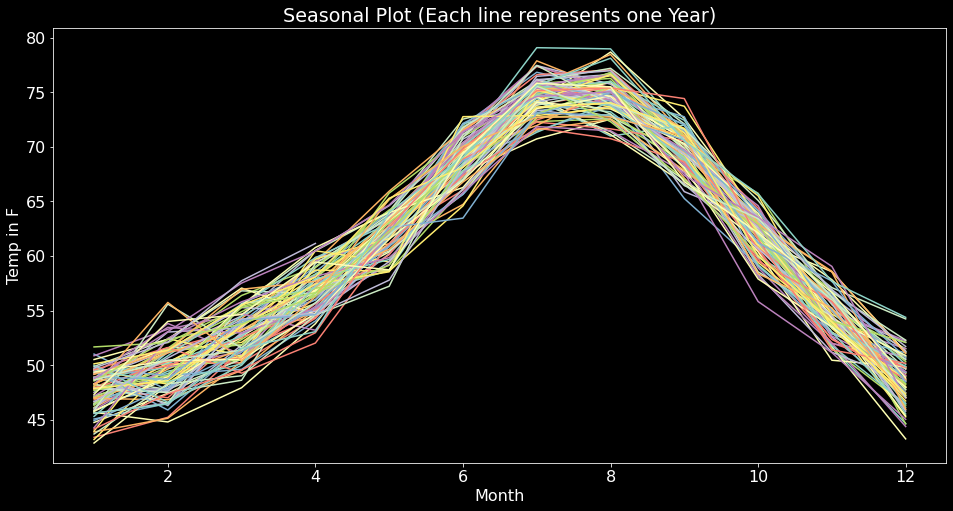

In [13]:
train.averagetemperature.groupby([train.index.year, train.index.month]).mean().unstack(0).plot(title='Seasonal Plot (Each line represents one Year)')
plt.legend().set_visible(False)
plt.xlabel('Month')
plt.ylabel('Temp in F')
plt.show()

## Takeaways
- We can visually confirm that the temperature cycles yearly.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Modeling 



In [14]:
## Dropping temperature uncertainty column
train = train.drop(columns='averagetemperatureuncertainty')
validate = validate.drop(columns='averagetemperatureuncertainty')
test = test.drop(columns='averagetemperatureuncertainty')

## Last Observed Value: The future will look like the now

In [15]:
# evaluation function to compute rmse
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [16]:
# plot and evaluate 
def plot_and_eval(model, target_var):
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(model.title())
    plt.legend(['Train', 'Validate', 'Predicted'],loc='upper center',ncol=3,frameon=False,bbox_to_anchor=(0.5, 1))
    plt.xlabel('Date')
    plt.ylabel('Temperature in F')
    rmse = evaluate(target_var)
    print(target_var.title(), '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [17]:
# create an empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

,model_type,target_var,rmse


In [18]:
# function to store the rmse so that we can compare
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [19]:
# take the last item of amount and assign to variable
temp = train['averagetemperature'][-1:][0]
temp

61.156400000000005

In [20]:
yhat_df = pd.DataFrame(
    {'averagetemperature': [temp]},
    index=validate.index)

yhat_df.head()

,averagetemperature
dt,
1931-05-01,61.1564
1931-06-01,61.1564
1931-07-01,61.1564
1931-08-01,61.1564
1931-09-01,61.1564


Averagetemperature -- RMSE: 10


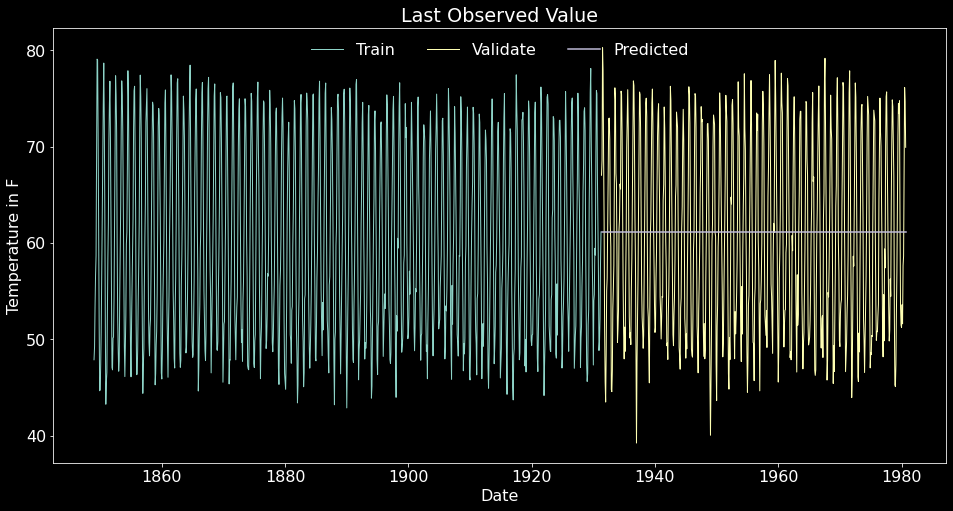

In [21]:
plot_and_eval('Last Observed Value','averagetemperature')

In [22]:
eval_df = append_eval_df(model_type = 'last_observed_value', 
                            target_var = 'averagetemperature')

eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0


## Simple Average: The future will look, on average, like history.

In [23]:
# compute simple average
temp = round(train['averagetemperature'].mean(), 2)
temp

60.15

In [24]:
def make_predictions(amount=None):
    yhat_df = pd.DataFrame({'averagetemperature': [temp]},
                          index=validate.index)
    return yhat_df

In [25]:
yhat_df = make_predictions(temp)
yhat_df.head()

,averagetemperature
dt,
1931-05-01,60.15
1931-06-01,60.15
1931-07-01,60.15
1931-08-01,60.15
1931-09-01,60.15


Averagetemperature -- RMSE: 10


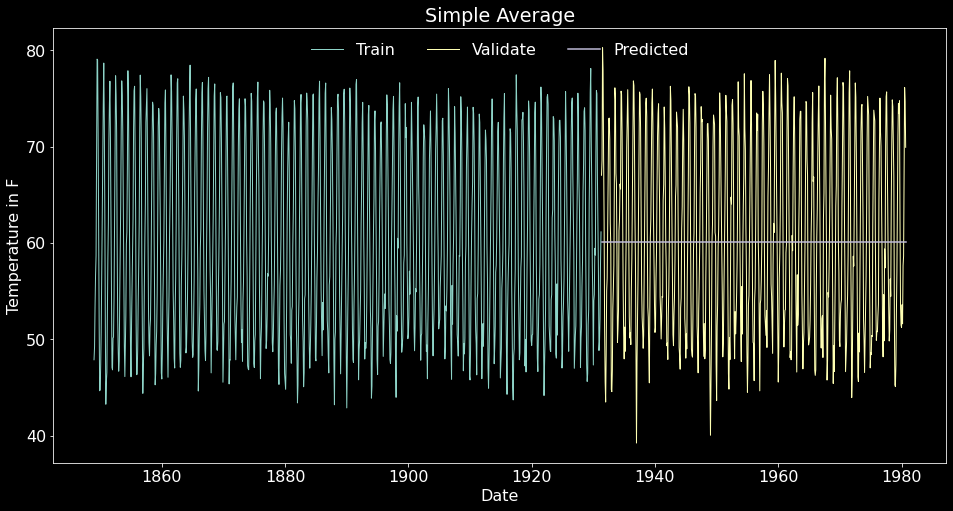

In [26]:
plot_and_eval('Simple Average','averagetemperature')

In [27]:
eval_df = append_eval_df(model_type='simple_average', 
                            target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0


## Moving Average

In [28]:
period = 3

# take 90 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
temp = round(train['averagetemperature'].rolling(period).mean()[-1], 2)
print(temp)

57.0


In [29]:
yhat_df = make_predictions(temp)
yhat_df.head()

,averagetemperature
dt,
1931-05-01,57.0
1931-06-01,57.0
1931-07-01,57.0
1931-08-01,57.0
1931-09-01,57.0


Averagetemperature -- RMSE: 10


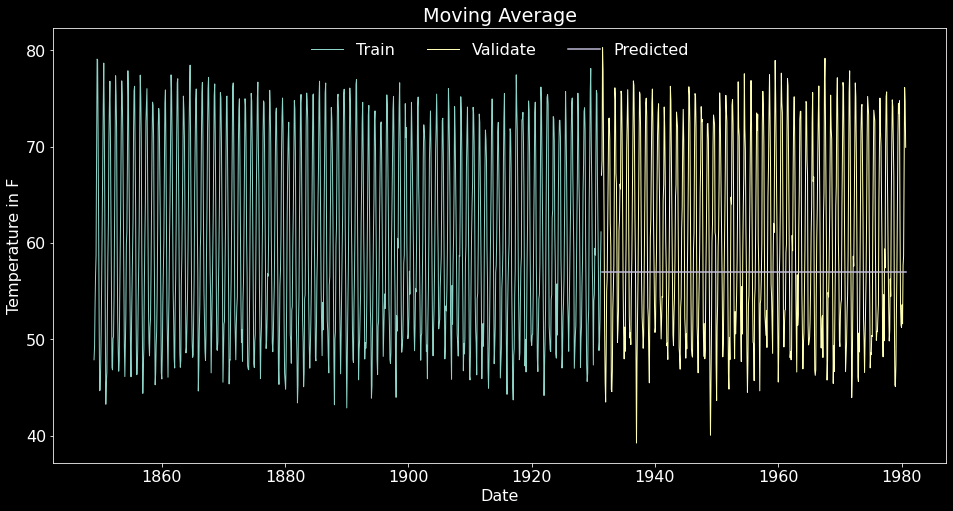

In [30]:
plot_and_eval('Moving Average','averagetemperature')

In [31]:
eval_df = append_eval_df(model_type='moving_average', 
                            target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0
2,moving_average,averagetemperature,10.0


## Holt's Linear Trend

In [32]:
model = Holt(train['averagetemperature'], exponential = False)
model = model.fit(smoothing_level = .1, 
                    smoothing_slope = .1, 
                    optimized = False)
yhat_items = model.predict(start = validate.index[0], 
                            end = validate.index[-1])
yhat_df['averagetemperature'] = round(yhat_items, 2)

Averagetemperature -- RMSE: 53


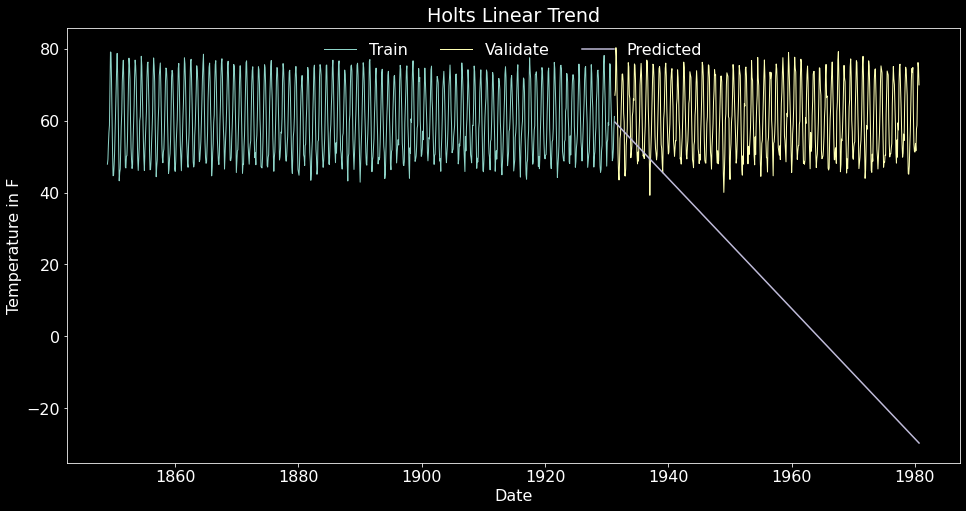

In [33]:
plot_and_eval('Holts Linear Trend','averagetemperature')


In [34]:
eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0
2,moving_average,averagetemperature,10.0
3,Holts,averagetemperature,53.0


## Predict Based on Previous Cycle

In [35]:
# Resplit Data
train = df.loc[:'1954']
validate = df.loc['1955':'1989']
test = df.loc['1990':]


In [36]:
train.shape, validate.shape, test.shape

((1272, 7), (420, 7), (285, 7))

In [37]:
# predict next 35 years based upon previous year's values for subsequent years we add the yearly average increase
# i calculated earlier
for i in range(1, 36):
    if i==1:
        yhat_df = pd.DataFrame(train['1954'].averagetemperature + train.averagetemperature.diff(12).mean())
    else:
        new_year = pd.DataFrame(yhat_df.tail(12).averagetemperature + test.averagetemperature.diff(12).mean())
        yhat_df = pd.concat([yhat_df,new_year])

yhat_df.index = validate.index
        

In [38]:
pd.concat([yhat_df.head(1), validate.head(1)])


,averagetemperature,averagetemperatureuncertainty,city,country,latitude,longitude,month
dt,,,,,,,
1955-01-01,47.69459,NaN,NaN,NaN,NaN,NaN,NaN
1955-01-01,44.49560,0.347,Los Angeles,United States,34.56N,118.70W,January


Averagetemperature -- RMSE: 4


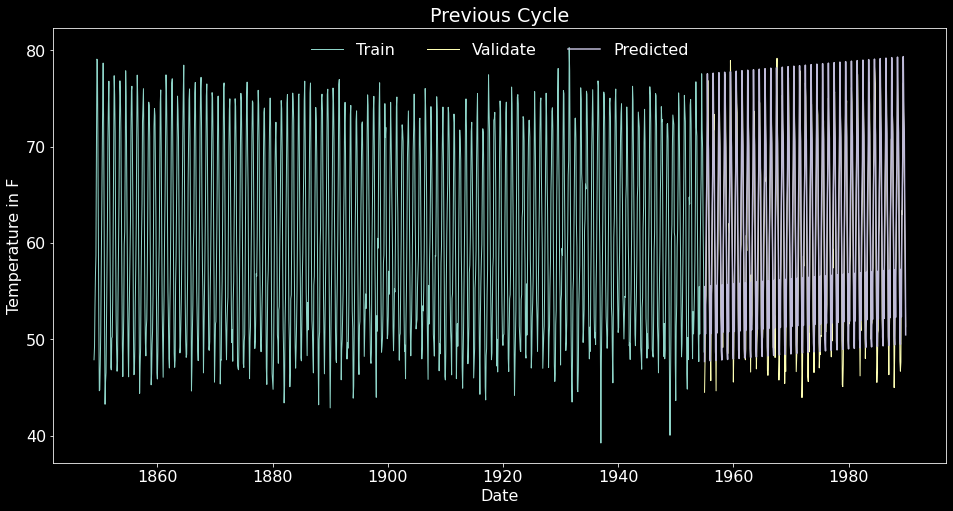

In [39]:
plot_and_eval('Previous Cycle','averagetemperature')

In [40]:
# Let's see how the models compare
eval_df = append_eval_df(model_type = 'previous year', target_var = 'averagetemperature')
eval_df

,model_type,target_var,rmse
0,last_observed_value,averagetemperature,10.0
1,simple_average,averagetemperature,10.0
2,moving_average,averagetemperature,10.0
3,Holts,averagetemperature,53.0
4,previous year,averagetemperature,4.0


## Running on Test dataset

In [41]:
yhat_df = pd.DataFrame(validate.averagetemperature + train.averagetemperature.diff(12).mean())
yhat_df = pd.DataFrame(yhat_df.head(285))
yhat_df.index = test.index

In [42]:
rmse_avgtemp = round(sqrt(mean_squared_error(test['averagetemperature'], yhat_df['averagetemperature'])), 0)

In [43]:
# Plot and evaluate train, validate, and test
def plot_and_eval_test(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(test[target_var], label = 'Test', linewidth = 1)
    plt.plot(yhat_df[target_var], alpha = .5, color="red")
    plt.title(target_var)
    plt.legend()
    plt.show()

rmse - average_temperature:  4.0


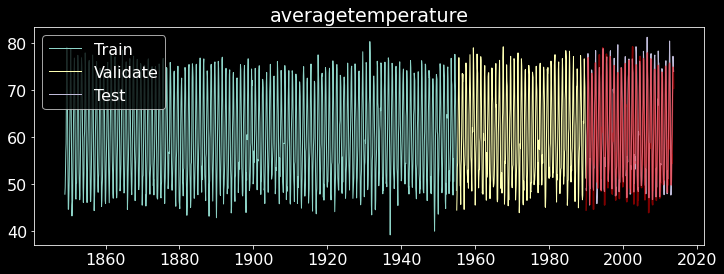

In [44]:
print("rmse - average_temperature: ", rmse_avgtemp)
plot_and_eval_test('averagetemperature')

## Modeling takeaways

- Of all models chosen the best performing model was the Previous Cycle Model with a RMSE of only 4.0 on the test dataset.

- With this being consistent among train, validate, and test sets. Further adjustments could be made to lower if needed.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Conclusions, Reccomendations and Next Steps

- Thankfully weather seems to follow a consistent pattern even with a data sample as big as this one.

- Improvements of this model can be made once the rate at which weather increases is found, it can then be applied to the model for a more accurate model.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>